In [43]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [44]:
cwd = os.getcwd()
pokemon_path = os.path.join(os.path.dirname(cwd),'Data','pokemon.csv')

# Reading Data for Pokemon Dataset

In [45]:
pokemon_data = pd.read_csv(pokemon_path)

In [46]:
pokemon_data

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


# Basic Analysis for Structure of Data

In [47]:
# info of data telling column how many values present in a columna and datatype
pokemon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [48]:
# datatypes for all columns
pokemon_data.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [49]:
# unique values in columns
pokemon_data.nunique()

#             800
Name          799
Type 1         18
Type 2         18
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

In [50]:
# get basic overview of all stats
pokemon_data.iloc[:,list(range(4,10))].describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [51]:
pokemon_data['Generation'].nunique()
pokemon_data['Generation'].unique().tolist()

6

[1, 2, 3, 4, 5, 6]

In [52]:
pokemon_data['Legendary'].value_counts()

Legendary
False    735
True      65
Name: count, dtype: int64

# Checking for Values after Analysing Structure

### checking for name not present

In [53]:
pokemon_data[pokemon_data['Name'].isna()]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


In [54]:
# checking which is previous to the missing one
pokemon_data.loc[61]

#                   62
Name            Mankey
Type 1        Fighting
Type 2             NaN
HP                  40
Attack              80
Defense             35
Sp. Atk             35
Sp. Def             45
Speed               70
Generation           1
Legendary        False
Name: 61, dtype: object

In [55]:
# assigning value to primeape as it is evolution of previous one
pokemon_data.loc[62,'Name'] = 'Primeape'

In [56]:
# checking if value assigned properly
pokemon_data.loc[62]

#                   63
Name          Primeape
Type 1        Fighting
Type 2             NaN
HP                  65
Attack             105
Defense             60
Sp. Atk             60
Sp. Def             70
Speed               95
Generation           1
Legendary        False
Name: 62, dtype: object

In [57]:
# checking how many unique names are there in dataset
pokemon_data['Name'].nunique()

800

### checking value_counts for type1 and type2

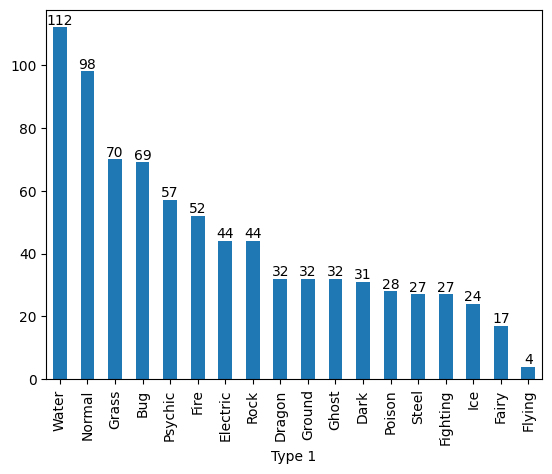

In [58]:
# plot for type 1
ax = pokemon_data['Type 1'].value_counts()
ax.plot(kind = 'bar')
for label, value in enumerate(ax):
    plt.text(label, value, str(value), ha = 'center', va='bottom')
plt.show();


# another way to do this
# ax = pokemon_data['Type 1'].value_counts().plot(kind = 'bar')
# for container in ax.containers:
#     ax.bar_label(container)
# plt.show();

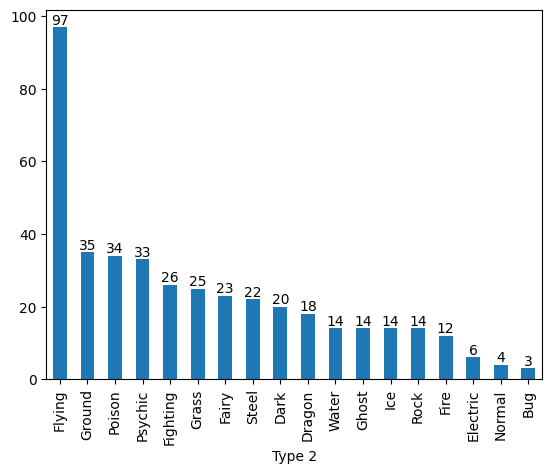

In [59]:
# plot for type 2
ax = pokemon_data['Type 2'].value_counts()
ax.plot(kind = 'bar')
for label, value in enumerate(ax):
    plt.text(label, value, str(value), ha = 'center', va = 'bottom')
plt.show();

# another way to do this
# ax = pokemon_data['Type 2'].value_counts().plot(kind = 'bar')
# for container in ax.containers:
#     ax.bar_label(container)
# plt.show();

### value_counts for type 1 and type 2

In [60]:
pokemon_data[['Type 1','Type 2']].value_counts()

Type 1    Type 2
Normal    Flying    24
Grass     Poison    15
Bug       Flying    14
          Poison    12
Ghost     Grass     10
                    ..
Fire      Rock       1
Ice       Ghost      1
Fire      Dragon     1
Fighting  Flying     1
Water     Steel      1
Name: count, Length: 136, dtype: int64

### plot for value_counts for generations

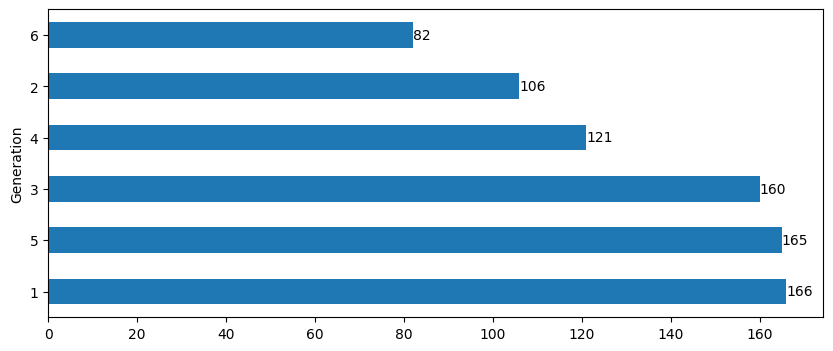

In [61]:
plt.figure(figsize=(10, 4))
ax = pokemon_data['Generation'].value_counts()
ax.plot(kind = 'barh')
for label, value in enumerate(pokemon_data['Generation'].value_counts()):
    plt.text(value, label, str(value), ha='left', va='center')
plt.show();

# another way to plot this
# ax = sns.countplot(data = pokemon_data, y = 'Generation' , orient = 'h')
# for container in ax.containers:
#     ax.bar_label(container)
# plt.show();

### plot for legendaries

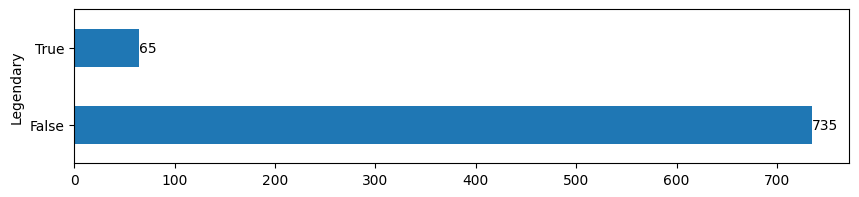

In [62]:
plt.figure(figsize=(10, 2))
ax = pokemon_data['Legendary'].value_counts()
ax.plot(kind = 'barh')
for label, value in enumerate(pokemon_data['Legendary'].value_counts()):
    plt.text(value, label, str(value), ha='left', va='center')
plt.show();

# another way to plot this
# plt.figure(figsize=(10,2))
# ax = sns.countplot(data = pokemon_data, y = 'Legendary', orient = 'h')
# for container in ax.containers:
#     ax.bar_label(container)
# plt.show();

# Feature Engineering

> total --> sum of all parameters<br>
> physical total --> sum of physical parameters<br>
> special total --> sum of special parameters<br>
> attack total --> sum of attacks<br>
> defense total --> sum of defense<br>
> mega evolution --> flag for mega evolution

In [63]:
pokemon_data.columns = pokemon_data.columns.str.lower()
pokemon_data.columns

Index(['#', 'name', 'type 1', 'type 2', 'hp', 'attack', 'defense', 'sp. atk',
       'sp. def', 'speed', 'generation', 'legendary'],
      dtype='object')

In [64]:
# total
pokemon_data['total'] = pokemon_data['hp'] + pokemon_data['attack'] + pokemon_data['defense'] + \
    pokemon_data['sp. atk'] + pokemon_data['sp. def'] + pokemon_data['speed']

# physical total
pokemon_data['physical total'] = pokemon_data['attack'] + pokemon_data['defense']

# special total
pokemon_data['special total'] = pokemon_data['sp. atk'] + pokemon_data['sp. def']

# attack total
pokemon_data['attack total'] = pokemon_data['attack'] + pokemon_data['sp. atk']

# defense total
pokemon_data['defense total'] = pokemon_data['defense'] + pokemon_data['sp. def']

In [65]:
pokemon_data.iloc[:,list(range(4,10)) + list(range(12,pokemon_data.shape[1]))].describe()

,hp,attack,defense,sp. atk,sp. def,speed,total,physical total,special total,attack total,defense total
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,435.10250,152.843750,144.722500,151.821250,145.745000
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,119.96304,53.980661,52.602012,54.462505,51.315827
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,180.00000,10.000000,35.000000,20.000000,35.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,330.00000,112.000000,105.000000,111.750000,109.750000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,450.00000,150.000000,140.000000,146.500000,140.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,515.00000,188.250000,180.000000,182.000000,180.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,780.00000,370.000000,340.000000,360.000000,460.000000


In [66]:
# flag for pokemon which is mega evolution
pokemon_data['mega evolution flag'] = pokemon_data['name'].str.contains('mega',case=False)

In [67]:
pokemon_data['num types'] = pokemon_data['type 1'].notna().astype(int) + pokemon_data['type 2'].notna().astype(int)

# Analysing Pokemon with different stats

In [68]:
features = ['hp','attack','defense','sp. atk', 'sp. def', 'speed', 'total', 'physical total', 'special total', 'attack total', 'defense total']
features

['hp',
 'attack',
 'defense',
 'sp. atk',
 'sp. def',
 'speed',
 'total',
 'physical total',
 'special total',
 'attack total',
 'defense total']

### minimum for all features

In [69]:
for feature in features:
    print(feature)
    pokemon_data[pokemon_data[feature] == pokemon_data[feature].min()]

hp


,#,name,type 1,type 2,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,total,physical total,special total,attack total,defense total,mega evolution flag,num types
316,317,Shedinja,Bug,Ghost,1,90,45,30,30,40,3,False,236,135,60,120,75,False,2


attack


,#,name,type 1,type 2,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,total,physical total,special total,attack total,defense total,mega evolution flag,num types
121,122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False,450,10,140,40,110,False,1
488,489,Happiny,Normal,NaN,100,5,5,15,65,30,4,False,220,10,80,20,70,False,1


defense


,#,name,type 1,type 2,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,total,physical total,special total,attack total,defense total,mega evolution flag,num types
121,122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False,450,10,140,40,110,False,1
488,489,Happiny,Normal,NaN,100,5,5,15,65,30,4,False,220,10,80,20,70,False,1


sp. atk


,#,name,type 1,type 2,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,total,physical total,special total,attack total,defense total,mega evolution flag,num types
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,505,240,240,20,460,False,2
381,382,Feebas,Water,NaN,20,15,20,10,55,80,3,False,200,35,65,25,75,False,1
486,487,Bonsly,Rock,NaN,50,80,95,10,45,10,4,False,290,175,55,90,140,False,1


sp. def


,#,name,type 1,type 2,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,total,physical total,special total,attack total,defense total,mega evolution flag,num types
13,14,Caterpie,Bug,NaN,45,30,35,20,20,45,1,False,195,65,40,50,55,False,1
16,17,Weedle,Bug,Poison,40,35,30,20,20,50,1,False,195,65,40,55,50,False,2
139,140,Magikarp,Water,NaN,20,10,55,15,20,80,1,False,200,65,35,25,75,False,1
188,189,Igglybuff,Normal,Fairy,90,30,15,40,20,15,2,False,210,45,60,70,35,False,2
347,348,Carvanha,Water,Dark,45,90,20,65,20,65,3,False,305,110,85,155,40,False,2
429,430,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,3,True,600,200,200,360,40,False,1


speed


,#,name,type 1,type 2,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,total,physical total,special total,attack total,defense total,mega evolution flag,num types
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,505,240,240,20,460,False,2
495,496,Munchlax,Normal,NaN,135,85,40,40,85,5,4,False,390,125,125,125,125,False,1


total


,#,name,type 1,type 2,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,total,physical total,special total,attack total,defense total,mega evolution flag,num types
206,207,Sunkern,Grass,NaN,30,30,30,30,30,30,2,False,180,60,60,60,60,False,1


physical total


,#,name,type 1,type 2,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,total,physical total,special total,attack total,defense total,mega evolution flag,num types
121,122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False,450,10,140,40,110,False,1
488,489,Happiny,Normal,NaN,100,5,5,15,65,30,4,False,220,10,80,20,70,False,1


special total


,#,name,type 1,type 2,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,total,physical total,special total,attack total,defense total,mega evolution flag,num types
139,140,Magikarp,Water,NaN,20,10,55,15,20,80,1,False,200,65,35,25,75,False,1


attack total


,#,name,type 1,type 2,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,total,physical total,special total,attack total,defense total,mega evolution flag,num types
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,505,240,240,20,460,False,2
488,489,Happiny,Normal,NaN,100,5,5,15,65,30,4,False,220,10,80,20,70,False,1


defense total


,#,name,type 1,type 2,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,total,physical total,special total,attack total,defense total,mega evolution flag,num types
188,189,Igglybuff,Normal,Fairy,90,30,15,40,20,15,2,False,210,45,60,70,35,False,2


### maximum for all features

In [70]:
for feature in features:
    print(feature)
    pokemon_data[pokemon_data[feature] == pokemon_data[feature].max()]

hp


,#,name,type 1,type 2,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,total,physical total,special total,attack total,defense total,mega evolution flag,num types
261,262,Blissey,Normal,NaN,255,10,10,75,135,55,2,False,540,20,210,85,145,False,1


attack


,#,name,type 1,type 2,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,total,physical total,special total,attack total,defense total,mega evolution flag,num types
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,780,290,254,344,200,True,2


defense


,#,name,type 1,type 2,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,total,physical total,special total,attack total,defense total,mega evolution flag,num types
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False,610,355,150,180,325,True,2
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,505,240,240,20,460,False,2
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False,630,370,140,200,310,True,1


sp. atk


,#,name,type 1,type 2,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,total,physical total,special total,attack total,defense total,mega evolution flag,num types
164,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,780,220,314,344,190,True,1


sp. def


,#,name,type 1,type 2,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,total,physical total,special total,attack total,defense total,mega evolution flag,num types
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,505,240,240,20,460,False,2


speed


,#,name,type 1,type 2,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,total,physical total,special total,attack total,defense total,mega evolution flag,num types
431,432,Deoxys Speed Forme,Psychic,NaN,50,95,90,95,90,180,3,True,600,185,185,190,180,False,1


total


,#,name,type 1,type 2,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,total,physical total,special total,attack total,defense total,mega evolution flag,num types
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,780,290,254,344,200,True,2
164,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,780,220,314,344,190,True,1
426,427,Mega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True,780,280,280,360,200,True,2


physical total


,#,name,type 1,type 2,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,total,physical total,special total,attack total,defense total,mega evolution flag,num types
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False,630,370,140,200,310,True,1


special total


,#,name,type 1,type 2,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,total,physical total,special total,attack total,defense total,mega evolution flag,num types
422,423,Primal Kyogre,Water,NaN,100,150,90,180,160,90,3,True,770,240,340,330,250,False,1


attack total


,#,name,type 1,type 2,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,total,physical total,special total,attack total,defense total,mega evolution flag,num types
426,427,Mega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True,780,280,280,360,200,True,2
429,430,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,3,True,600,200,200,360,40,False,1


defense total


,#,name,type 1,type 2,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,total,physical total,special total,attack total,defense total,mega evolution flag,num types
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,505,240,240,20,460,False,2


### how many mega evolutions there ?

In [71]:
pokemon_data['mega evolution flag'].value_counts()

mega evolution flag
False    750
True      50
Name: count, dtype: int64

### mega evolution according to generations

In [72]:
pd.crosstab(pokemon_data['generation'], pokemon_data['mega evolution flag'])
pokemon_data.groupby(['generation', 'mega evolution flag']).size()

mega evolution flag,False,True
generation,,
1,151,15
2,99,7
3,140,20
4,115,6
5,164,1
6,81,1


generation  mega evolution flag
1           False                  151
            True                    15
2           False                   99
            True                     7
3           False                  140
            True                    20
4           False                  115
            True                     6
5           False                  164
            True                     1
6           False                   81
            True                     1
dtype: int64

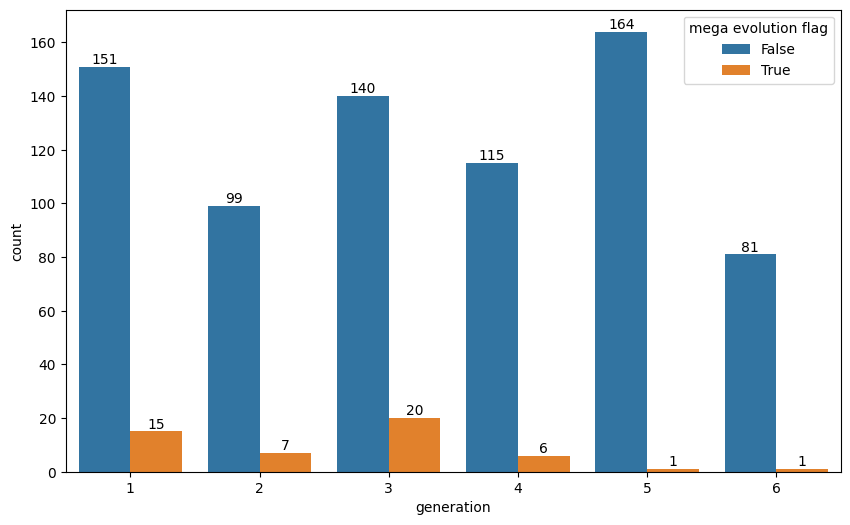

In [73]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data = pokemon_data, x = 'generation', hue = 'mega evolution flag')
for container in ax.containers:
    ax.bar_label(container)
plt.show();

### mega evolution for legendaries

In [74]:
pd.crosstab(pokemon_data['legendary'], pokemon_data['mega evolution flag'])
pokemon_data.groupby(['legendary', 'mega evolution flag']).size()

mega evolution flag,False,True
legendary,,
False,691,44
True,59,6


legendary  mega evolution flag
False      False                  691
           True                    44
True       False                   59
           True                     6
dtype: int64

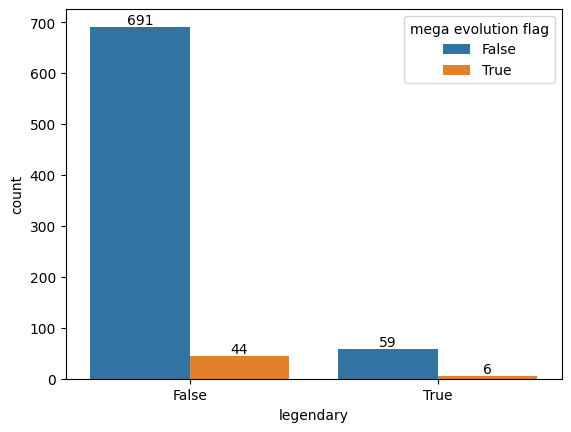

In [75]:
ax = sns.countplot(data = pokemon_data, x = 'legendary', hue = 'mega evolution flag')
for container in ax.containers:
    ax.bar_label(container)
plt.show();

In [76]:
pokemon_data

,#,name,type 1,type 2,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,total,physical total,special total,attack total,defense total,mega evolution flag,num types
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,98,130,114,114,False,2
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405,125,160,142,143,False,2
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525,165,200,182,183,False,2
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625,223,242,222,243,True,2
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309,95,110,112,93,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600,250,250,200,300,False,2
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700,270,270,320,220,True,2
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600,170,280,260,190,False,2
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680,220,300,330,190,False,2


# Correlation Analysis

> mega evolution and stats<br>
> number of types and stats<br>
> legendary and stats<br>
> legendary and number of types<br>

In [77]:
pokemon_data.columns

Index(['#', 'name', 'type 1', 'type 2', 'hp', 'attack', 'defense', 'sp. atk',
       'sp. def', 'speed', 'generation', 'legendary', 'total',
       'physical total', 'special total', 'attack total', 'defense total',
       'mega evolution flag', 'num types'],
      dtype='object')

In [78]:
# correlation for stats
pokemon_data.iloc[:, list(range(4, 10)) + list(range(13,17)) + [12]].corr()

,hp,attack,defense,sp. atk,sp. def,speed,physical total,special total,attack total,defense total,total
hp,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.392396,0.425786,0.469450,0.350995,0.618748
attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.854698,0.386229,0.834101,0.409744,0.736211
defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.841452,0.409272,0.395752,0.884659,0.612787
sp. atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.367463,0.889835,0.837037,0.410319,0.747250
sp. def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.453779,0.843891,0.461416,0.852676,0.717609
speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.238027,0.431345,0.511403,0.149782,0.575943
physical total,0.392396,0.854698,0.841452,0.367463,0.453779,0.238027,1.000000,0.468659,0.730144,0.757419,0.796662
special total,0.425786,0.386229,0.409272,0.889835,0.843891,0.431345,0.468659,1.000000,0.764809,0.706354,0.844493
attack total,0.469450,0.834101,0.395752,0.837037,0.461416,0.511403,0.730144,0.764809,1.000000,0.490719,0.887715
defense total,0.350995,0.409744,0.884659,0.410319,0.852676,0.149782,0.757419,0.706354,0.490719,1.000000,0.761542


In [79]:
# correlation for number of types and stats
pokemon_data.iloc[:, list(range(4, 10)) + list(range(13, 17)) + [12] + [pokemon_data.shape[1] - 1]].corr()

,hp,attack,defense,sp. atk,sp. def,speed,physical total,special total,attack total,defense total,total,num types
hp,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.392396,0.425786,0.469450,0.350995,0.618748,0.056452
attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.854698,0.386229,0.834101,0.409744,0.736211,0.133223
defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.841452,0.409272,0.395752,0.884659,0.612787,0.193868
sp. atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.367463,0.889835,0.837037,0.410319,0.747250,0.133906
sp. def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.453779,0.843891,0.461416,0.852676,0.717609,0.136391
speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.238027,0.431345,0.511403,0.149782,0.575943,0.079770
physical total,0.392396,0.854698,0.841452,0.367463,0.453779,0.238027,1.000000,0.468659,0.730144,0.757419,0.796662,0.192098
special total,0.425786,0.386229,0.409272,0.889835,0.843891,0.431345,0.468659,1.000000,0.764809,0.706354,0.844493,0.155457
attack total,0.469450,0.834101,0.395752,0.837037,0.461416,0.511403,0.730144,0.764809,1.000000,0.490719,0.887715,0.159849
defense total,0.350995,0.409744,0.884659,0.410319,0.852676,0.149782,0.757419,0.706354,0.490719,1.000000,0.761542,0.191775


In [80]:
# correlation for legendary and stats
pokemon_data.iloc[:, list(range(4, 10)) + list(range(12, 17)) + [11]].corr()

,hp,attack,defense,sp. atk,sp. def,speed,total,physical total,special total,attack total,defense total,legendary
hp,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.618748,0.392396,0.425786,0.469450,0.350995,0.273620
attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.736211,0.854698,0.386229,0.834101,0.409744,0.345408
defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.612787,0.841452,0.409272,0.395752,0.884659,0.246377
sp. atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.747250,0.367463,0.889835,0.837037,0.410319,0.448907
sp. def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.717609,0.453779,0.843891,0.461416,0.852676,0.363937
speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.575943,0.238027,0.431345,0.511403,0.149782,0.326715
total,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,1.000000,0.796662,0.844493,0.887715,0.761542,0.501758
physical total,0.392396,0.854698,0.841452,0.367463,0.453779,0.238027,0.796662,1.000000,0.468659,0.730144,0.757419,0.350013
special total,0.425786,0.386229,0.409272,0.889835,0.843891,0.431345,0.844493,0.468659,1.000000,0.764809,0.706354,0.471793
attack total,0.469450,0.834101,0.395752,0.837037,0.461416,0.511403,0.887715,0.730144,0.764809,1.000000,0.490719,0.475562


In [81]:
# correlation for mega evolution and stats
pokemon_data.columns.get_loc('mega evolution flag')
pokemon_data.iloc[:, list(range(4, 10)) + list(range(12, 17)) + [17]].corr()

17

,hp,attack,defense,sp. atk,sp. def,speed,total,physical total,special total,attack total,defense total,mega evolution flag
hp,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.618748,0.392396,0.425786,0.469450,0.350995,0.092896
attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.736211,0.854698,0.386229,0.834101,0.409744,0.360896
defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.612787,0.841452,0.409272,0.395752,0.884659,0.263116
sp. atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.747250,0.367463,0.889835,0.837037,0.410319,0.315980
sp. def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.717609,0.453779,0.843891,0.461416,0.852676,0.247114
speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.575943,0.238027,0.431345,0.511403,0.149782,0.227795
total,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,1.000000,0.796662,0.844493,0.887715,0.761542,0.384510
physical total,0.392396,0.854698,0.841452,0.367463,0.453779,0.238027,0.796662,1.000000,0.468659,0.730144,0.757419,0.368995
special total,0.425786,0.386229,0.409272,0.889835,0.843891,0.431345,0.844493,0.468659,1.000000,0.764809,0.706354,0.327297
attack total,0.469450,0.834101,0.395752,0.837037,0.461416,0.511403,0.887715,0.730144,0.764809,1.000000,0.490719,0.404927


In [82]:
# correlation for legendary and number of types
pokemon_data.iloc[: , [11, 18]].corr()

,legendary,num types
legendary,1.000000,0.058254
num types,0.058254,1.000000


# Pokemon Analysis

> pokemon with stats greater than 85 and 90 percentiles

In [83]:
pokemon_data.describe()

,#,hp,attack,defense,sp. atk,sp. def,speed,generation,total,physical total,special total,attack total,defense total,num types
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,435.10250,152.843750,144.722500,151.821250,145.745000,1.517500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,119.96304,53.980661,52.602012,54.462505,51.315827,0.500006
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,180.00000,10.000000,35.000000,20.000000,35.000000,1.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,330.00000,112.000000,105.000000,111.750000,109.750000,1.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,450.00000,150.000000,140.000000,146.500000,140.000000,2.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,515.00000,188.250000,180.000000,182.000000,180.000000,2.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,780.00000,370.000000,340.000000,360.000000,460.000000,2.000000


## Find best in all generations

In [84]:
pokemon_data['generation'].unique().tolist()

[1, 2, 3, 4, 5, 6]

### Generation Group By

In [128]:
generation_grp = pokemon_data.groupby('generation')

In [132]:
# non mega evolution flag and non legendary top 10 in all generations
generation_grp.apply(lambda grp : (grp[(~grp['mega evolution flag']) & (~grp['legendary'])]).nlargest(10,'total'))

/var/folders/3t/7vty8fs14dx8q_szrq7gcm5m0000gq/T/ipykernel_24820/2908670614.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  generation_grp.apply(lambda grp : (grp[(~grp['mega evolution flag']) & (~grp['legendary'])]).nlargest(10,'total'))


#                      name    type 1    type 2   hp  \
generation                                                               
1          161  162                 Dragonite    Dragon    Flying   91   
           165  166                       Mew   Psychic       NaN  100   
           64    65                  Arcanine      Fire       NaN   90   
           140  141                  Gyarados     Water    Flying   95   
           155  156                   Snorlax    Normal       NaN  160   
           142  143                    Lapras     Water       Ice  130   
           6      7                 Charizard      Fire    Flying   78   
           11    12                 Blastoise     Water       NaN   79   
           2      3                  Venusaur     Grass    Poison   80   
           98    99                  Cloyster     Water       Ice   50   
2          267  268                 Tyranitar      Rock      Dark  100   
           271  272                    Celebi   Psychic     Grass  100   
           249  250                   Kingdra     Water    Dragon   75   
           261  262                   Blissey    Normal       NaN  255   
           183  184                    Crobat    Poison    Flying   85   
           171  172                Typhlosion      Fire       NaN   78   
           174  175                Feraligatr     Water       NaN   85   
           211  212                    Espeon   Psychic       NaN   65   
           212  213                   Umbreon      Dark       NaN   95   
           252  253                  Porygon2    Normal       NaN   85   
3          313  314                   Slaking    Normal       NaN  150   
           408  409                 Salamence    Dragon    Flying   95   
           412  413                 Metagross     Steel   Psychic   80   
           382  383                   Milotic     Water       NaN   95   
           282  283                  Swampert     Water    Ground  100   
           274  275                  Sceptile     Grass       NaN   70   
           278  279                  Blaziken      Fire  Fighting   80   
           332  333                    Aggron     Steel      Rock   70   
           400  401                   Walrein       Ice     Water  110   
           361  362                    Flygon    Ground    Dragon   80   
4          493  494                  Garchomp    Dragon    Ground  108   
           546  547                 Cresselia   Psychic       NaN  120   
           548  549                   Manaphy     Water       NaN  100   
           519  520                  Togekiss     Fairy    Flying   85   
           517  518                Electivire  Electric       NaN   75   
           518  519                 Magmortar      Fire       NaN   75   
           513  514                 Magnezone  Electric     Steel   70   
           515  516                 Rhyperior    Ground      Rock  115   
           516  517                 Tangrowth     Grass       NaN  100   
           525  526                 Porygon-Z    Normal       NaN   85   
5          696  697                 Hydreigon      Dark    Dragon   92   
           715  716       Meloetta Aria Forme    Normal   Psychic  100   
           716  717  Meloetta Pirouette Forme    Normal  Fighting  100   
           717  718                  Genesect       Bug     Steel   71   
           713  714     Keldeo Ordinary Forme     Water  Fighting   91   
           714  715     Keldeo Resolute Forme     Water  Fighting   91   
           628  629                  Archeops      Rock    Flying   75   
           698  699                 Volcarona       Bug      Fire   85   
           616  617       Darmanitan Zen Mode      Fire   Psychic  105   
           673  674                   Haxorus    Dragon       NaN   76   
6          776  777                    Goodra    Dragon       NaN   90   
           739  740                   Florges     Fairy       NaN   78   
           791  792   

## Find best in all types